In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d as spline

import TwoPUtils as tpu
import STX3KO_analyses as stx

%matplotlib inline


%load_ext autoreload
%autoreload 2

In [2]:
nl_kwta = stx.wta.KWTA(eta=0, tau=0, w_norm_decay = 0,ca1_noise= 1, w_sigma_mag = 1E-1, ca3_sigma_mag=.05 )
nl_ca1 = nl_kwta.run_trials()


In [3]:
print(nl_ca1.shape)

(100, 30, 1000)


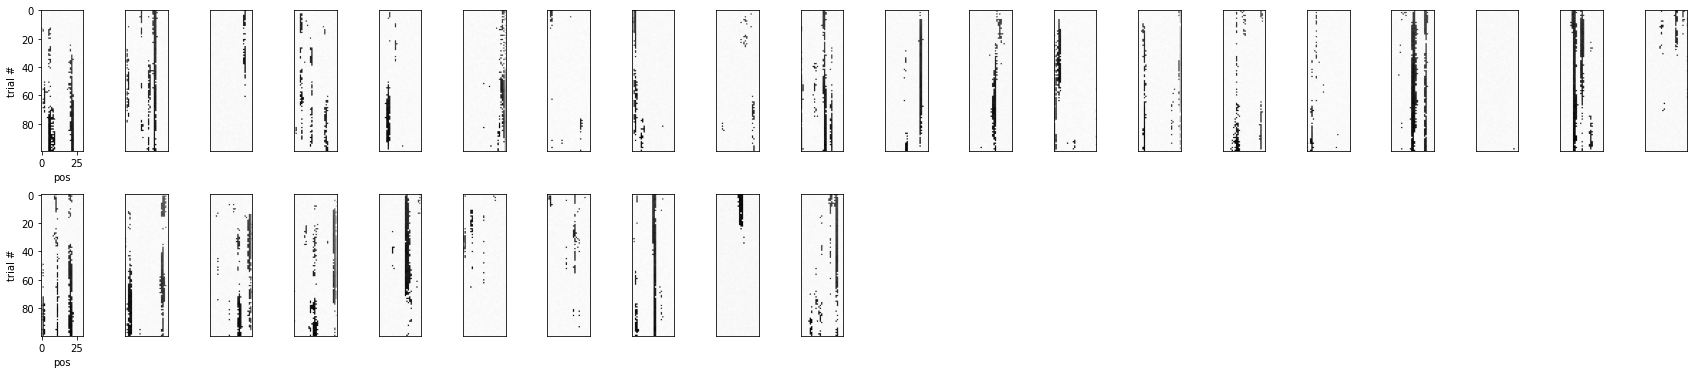

In [4]:
nl_singlecell_fig = stx.wta.plot_cells(nl_ca1, cell_inds = np.arange(0,30))

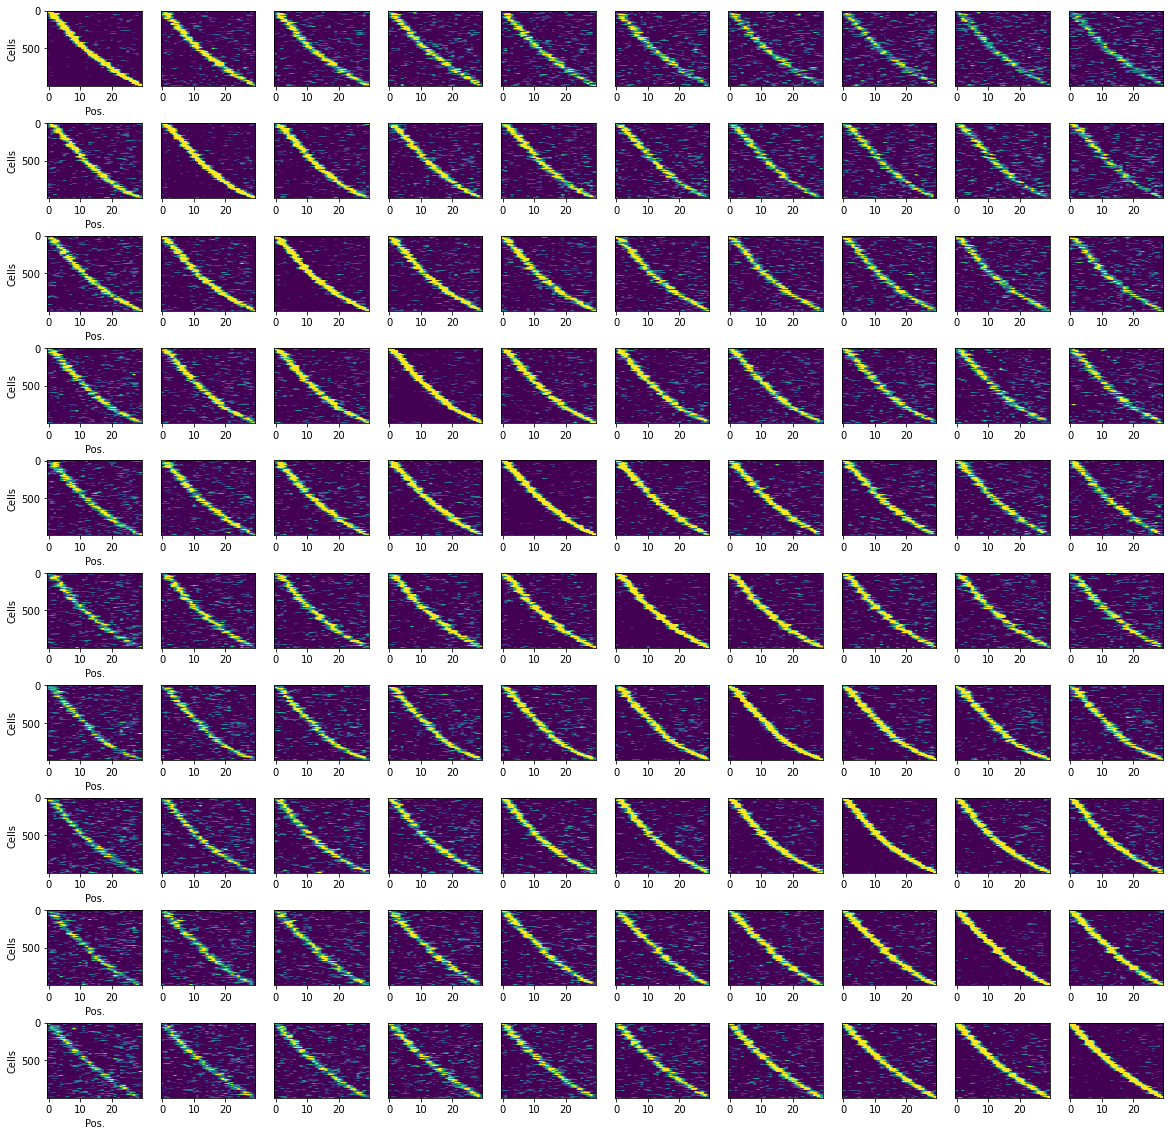

In [5]:
nl_pop_fig = stx.wta.plot_pop_activity(nl_ca1[::10,:,:])

In [6]:
l_kwta = stx.wta.KWTA(eta=1E-4, tau=1E-5, w_norm_decay = 0,ca1_noise= 1, w_sigma_mag = 1E-1, ca3_sigma_mag = .05)
l_ca1 = l_kwta.run_trials()

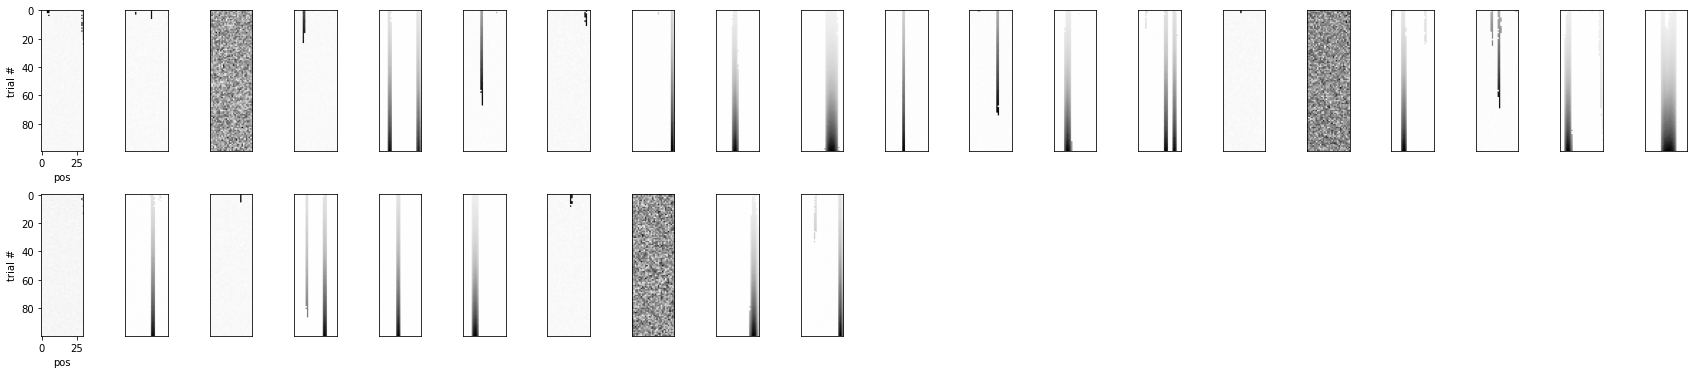

In [7]:
l_singlecell_fig = stx.wta.plot_cells(l_ca1, cell_inds = np.arange(0,30))

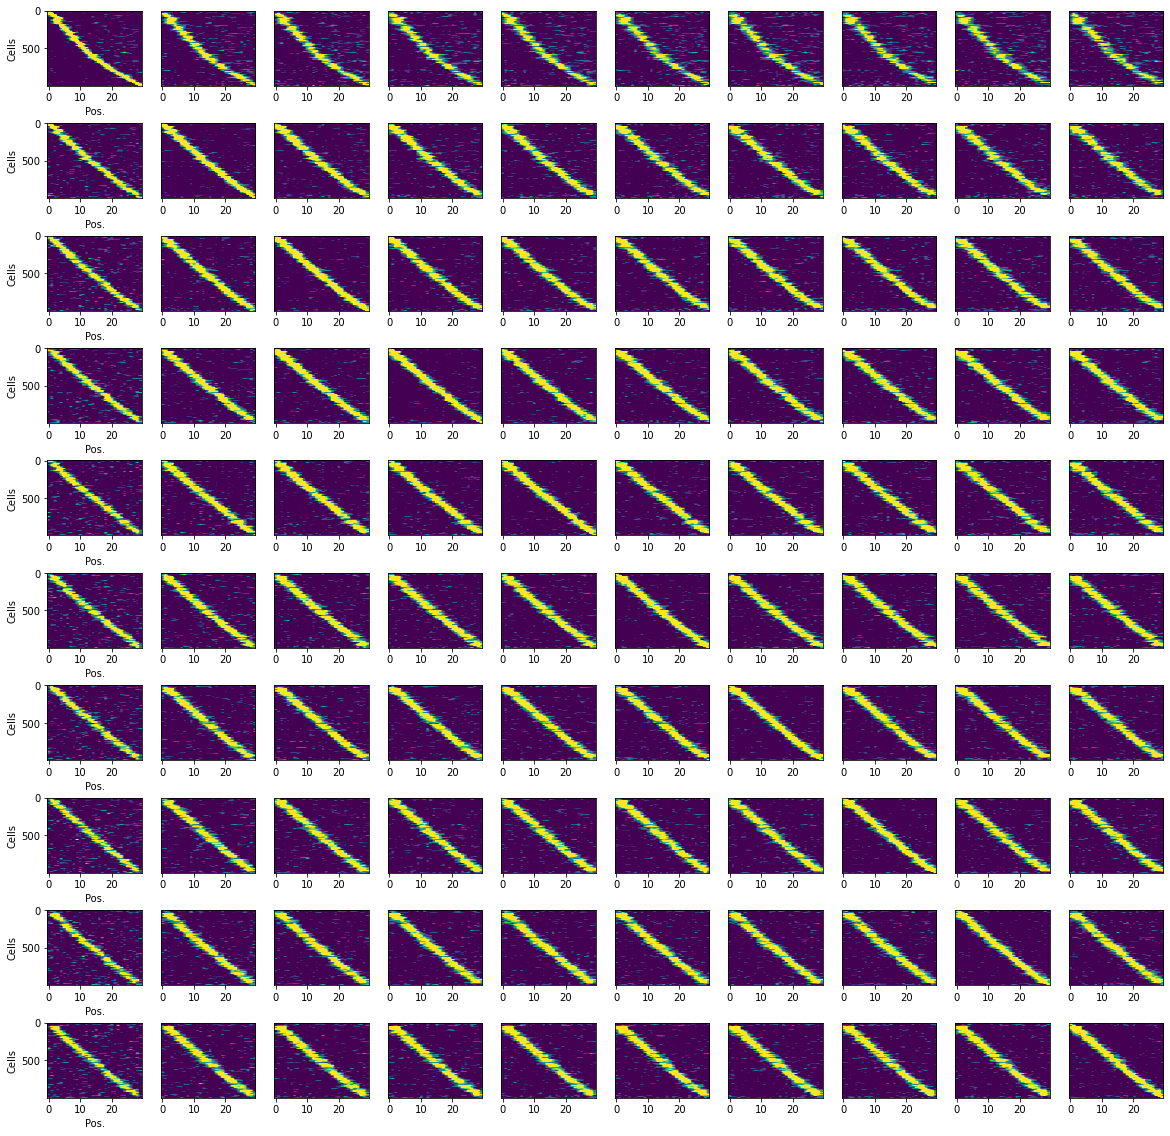

In [8]:
l_pop_fig = stx.wta.plot_pop_activity(l_ca1[::10,:,:])

In [9]:
occ = np.ones([30,])/30
nl_si = tpu.spatial_analyses.spatial_info(nl_ca1.mean(axis=0),occ)
l_si = tpu.spatial_analyses.spatial_info(l_ca1.mean(axis=0),occ)

(array([ 11.,   8.,  33.,  98., 212., 288., 201., 104.,  38.,   7.]),
 array([0.03778364, 0.332589  , 0.62739436, 0.92219972, 1.21700508,
        1.51181044, 1.8066158 , 2.10142116, 2.39622653, 2.69103189,
        2.98583725]),
 <BarContainer object of 10 artists>)

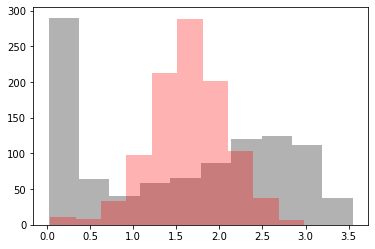

In [10]:
fig,ax = plt.subplots()
ax.hist(l_si, color='black', alpha=.3)
ax.hist(nl_si, color='red', alpha=.3)

In [11]:
l_mask = l_si>1
nl_mask = nl_si>1

l_trial_mat = l_ca1[:,:,l_mask]
l_trial_mat = l_trial_mat[-100:,:,:]
nl_trial_mat = nl_ca1[:,:,nl_mask]
nl_trial_mat = nl_trial_mat[-100:,:,:]

In [12]:
l_std = stx.spatial_analyses.spatial_std(l_trial_mat.mean(axis=0))
nl_std = stx.spatial_analyses.spatial_std(nl_trial_mat.mean(axis=0))

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01468189, 0.03262643, 0.05546493, 0.09624796, 0.13050571,
        0.18107667, 0.22838499, 0.30342577, 0.34910277, 0.40130506,
        0.4502447 , 0.50244698, 0.55301794, 0.59216966, 0.62153344,
        0.65089723, 0.67862969, 0.71288744, 0.74714519, 0.81076672,
        0.85644372, 0.91517129, 0.92495922, 0.95269168, 0.97553018,
        0.98368679, 0.98531811, 0.98858075, 0.98858075, 0.98858075,
        0.99184339, 0.99510604, 0.99836868, 1.        ]),
 array([ 0.        ,  0.24489796,  0.48979592,  0.73469388,  0.97959184,
         1.2244898 ,  1.46938776,  1.71428571,  1.95918367,  2.20408163,
         2.44897959,  2.69387755,  2.93877551,  3.18367347,  3.42857143,
         3.67346939,  3.91836735,  4.16326531,  4.40816327,  4.65306122,
         4.89795918,  5.14285714,  5.3

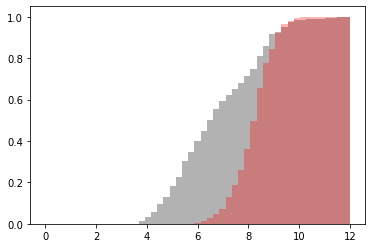

In [13]:
fig,ax = plt.subplots()
bins = np.linspace(0,12)
ax.hist(nl_std, bins = bins, color='red', alpha=.3,density=True, cumulative= True)
ax.hist(l_std,bins=bins, color='black', alpha=.3, zorder=-1,density=True, cumulative=True)

In [14]:
nl_fw = stx.spatial_analyses.field_width(nl_trial_mat.mean(axis=0))
l_fw = stx.spatial_analyses.field_width(l_trial_mat.mean(axis=0))

(array([0.        , 0.        , 0.04293381, 0.18962433, 0.23792487,
        0.18783542, 0.16100179, 0.05724508, 0.04830054, 0.02862254,
        0.02504472, 0.00536673, 0.00715564, 0.        , 0.00715564,
        0.00178891, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

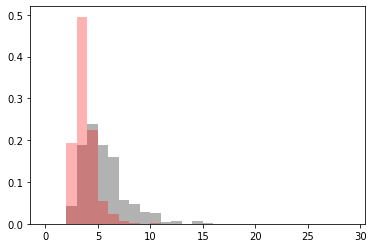

In [15]:
bins = np.arange(0,30)
fig,ax = plt.subplots()
ax.hist(nl_fw, bins = bins, color='red', alpha=.3,density=True)
ax.hist(l_fw,bins=bins, color='black', alpha=.3, zorder=-1,density=True)

In [16]:
l_peaks = stx.spatial_analyses.max_counts(l_trial_mat.mean(axis=0))
nl_peaks = stx.spatial_analyses.max_counts(nl_trial_mat.mean(axis=0))

(array([0.70881864, 0.27287854, 0.01830283, 0.        , 0.        ]),
 array([1, 2, 3, 4, 5, 6]),
 <BarContainer object of 5 artists>)

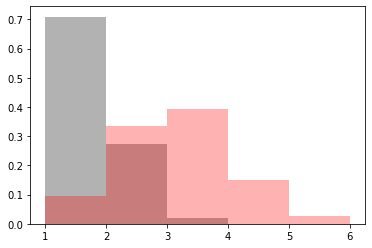

In [17]:
bins = np.arange(1,7)
fig,ax = plt.subplots()
ax.hist(nl_peaks, bins = bins, color='red', alpha=.3,density=True)
ax.hist(l_peaks,bins=bins, color='black', alpha=.3, zorder=-1,density=True)